# Clasificación Básica: Predecir una imagen de moda

Esta Guia entrena un modelo de red neuronal para clasificar imagenes de ropa como, tennis y camisetas.

Esta Guia usa [tf.keras](https://www.tensorflow.org/guide/keras), un API de alto nivel para construir y entrenar modelos en Tensorflow.

## Importar el set de datos de moda de MNIST

Esta guia usa el set de datos de [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
que contiene mas de 70,000 imagenes en 10 categorias. Las imagenes muestran articulos individuales de ropa a una resolucion baja (28 por 28 pixeles) como se ve aca:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Para importar y cargar el set de datos de MNIST directamente de TensorFlow:

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np

In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [7]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


La *class* de ropa que la imagen representa.

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen es mapeada a una unica etiqueta. Ya que los *Class names* no estan incluidos en el dataset.

## Explore el set de datos

* ¿Cuántas imágenes hay en train?
* ¿Y en test?
* ¿De cuántos pixels se compone cada imagen?
* ¿Cuáles son los valores de los labels?

In [8]:
num_train_images = train_images.shape[0]
num_test_images = test_images.shape[0]

print("Cantidad de imágenes en el conjunto de entrenamiento:", {num_train_images})
print("Cantidad de imágenes en el conjunto de prueba:", {num_test_images})


Cantidad de imágenes en el conjunto de entrenamiento: {60000}
Cantidad de imágenes en el conjunto de prueba: {10000}


In [12]:
image_shape = train_images.shape[1:] 
print(f"Cada imagen se compone de {image_shape[0] * image_shape[1]} píxeles ({image_shape[0]}x{image_shape[1]})")

Cada imagen se compone de 784 píxeles (28x28)


In [16]:
# Valores únicos de las etiquetas
unique_labels = set(train_labels)

print("Los valores de los labels son:", unique_labels)

Los valores de los labels son: {np.uint8(0), np.uint8(1), np.uint8(2), np.uint8(3), np.uint8(4), np.uint8(5), np.uint8(6), np.uint8(7), np.uint8(8), np.uint8(9)}


## Pre-procese el set de datos

Inspecciona y representa la primera imagen del dataset de train. Para ello, utiliza la función `imshow` de matplotlib.

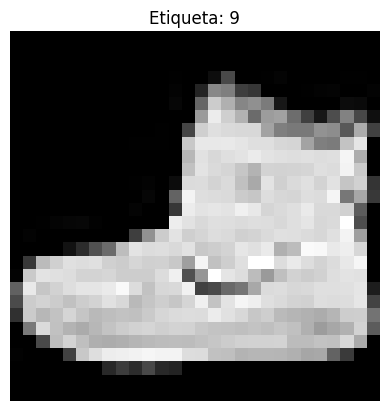

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0], cmap='gray')  
plt.title(f"Etiqueta: {train_labels[0]}")
plt.axis('off')
plt.show()

Escala los conjuntos de train y test para que vayan del 0 al 1. No hace falta usar ninguna librería. Con realizar una división en cada conjunto será suficiente.

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

print("Valores mínimos y máximos en train_images:", train_images.min(), train_images.max())
print("Valores mínimos y máximos en test_images:", test_images.min(), test_images.max())

Valores mínimos y máximos en train_images: 0.0 1.0
Valores mínimos y máximos en test_images: 0.0 1.0


Para verificar que el set de datos está en el formato adecuado y que están listos para construir y entrenar la red, vamos a desplegar las primeras 25 imágenes del *training set* y despleguemos el nombre de cada clase debajo de cada imagen.

In [20]:
class_names = ['Camiseta/Top', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo',
               'Sandalia', 'Camisa', 'Zapatilla', 'Bolso', 'Botín']

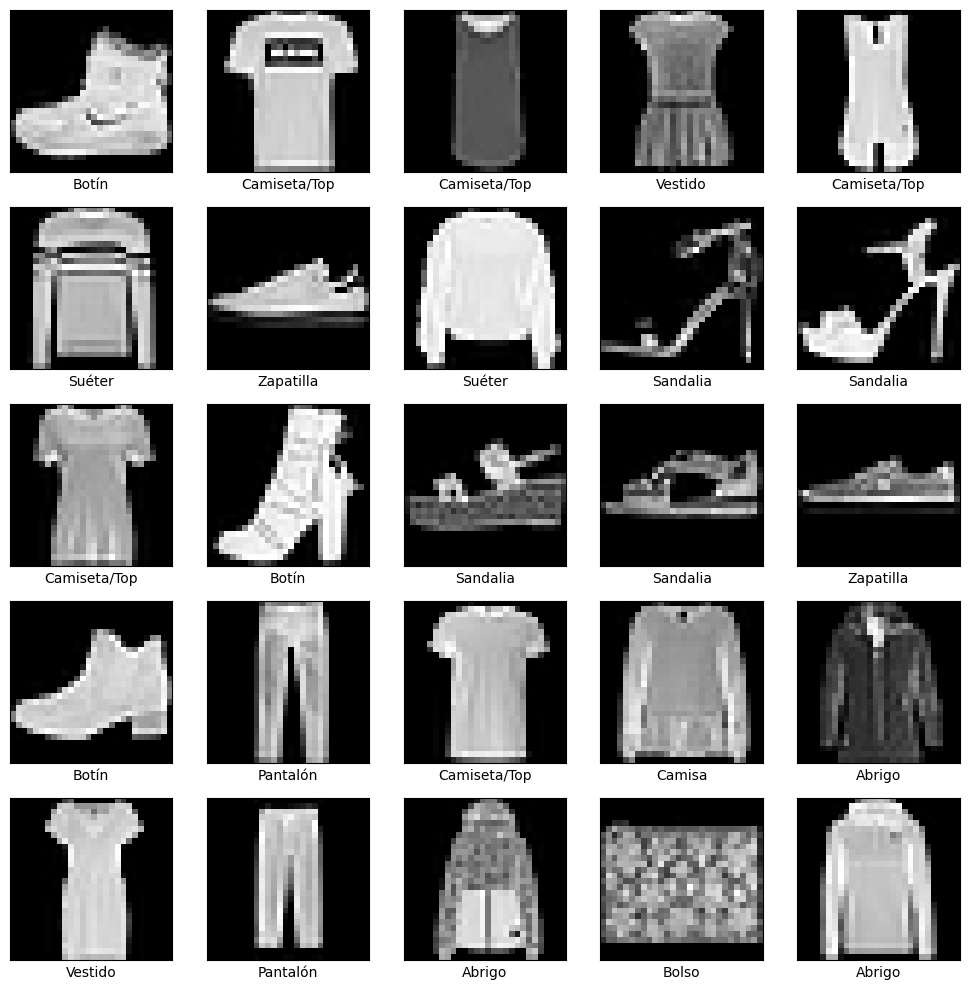

In [21]:
plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i + 1) 
    plt.xticks([]) 
    plt.yticks([]) 
    plt.grid(False) 
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(class_names[train_labels[i]]) 

plt.tight_layout()  
plt.show()

## Construir el Modelo

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [27]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),  
    layers.Dense(128, activation='relu'),  
    layers.Dense(10, activation='softmax')
])

### Configurar las Capas
Construye todas las capas del modelo.

In [28]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),

    layers.Dense(128, activation='relu'),

    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

### Compila el modelo

Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones más. Estas son agregadas durante el paso de compilacion del modelo:

* *Loss function* —Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta función para dirigir el modelo en la dirección adecuada.
* *Optimizer* — Esto es cómo el modelo aprende basado en el set de datos que ve y la función de pérdida.
* *Metrics* — Se usan para monitorear los pasos de entrenamiento y de pruebas.


Como es un problema de clasificación multiclase, tendrás que usar `sparse_categorical_crossentropy` como función de coste. En cuanto a las métricas, usa simplemente `accuracy`.

In [29]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']) 

## Entrenar el Modelo
Empieza entrenándolo con 10 epochs. Prueba con más

In [30]:
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7727 - loss: 0.6625 - val_accuracy: 0.8545 - val_loss: 0.4123
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8603 - loss: 0.3917 - val_accuracy: 0.8632 - val_loss: 0.3798
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8699 - loss: 0.3543 - val_accuracy: 0.8594 - val_loss: 0.3896
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8809 - loss: 0.3217 - val_accuracy: 0.8759 - val_loss: 0.3393
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8903 - loss: 0.3013 - val_accuracy: 0.8731 - val_loss: 0.3553
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8944 - loss: 0.2850 - val_accuracy: 0.8732 - val_loss: 0.3462
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8968 - loss: 0.2758 - val_accuracy: 0.8824 - val_loss: 0.3262
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9012 - loss: 0.2618 - 

## Evaluar Accuracy
Prueba el rendimiento del modelo con los datos de test

In [31]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8718 - loss: 0.3556
Precisión en el conjunto de prueba: 0.8738


## Hacer predicciones

Con el modelo entrenado puedes usarlo para hacer predicciones sobre imagenes.

In [32]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


El modelo ha predecido la etiqueta para cada imagen en el set de datos de *test* (prueba). Miremos la primera prediccion:

In [33]:
print(predictions[0])

predicted_label = predictions[0].argmax()
print(f"Etiqueta predicha: {predicted_label}")
print(f"Etiqueta real: {test_labels[0]}")

[8.8431037e-08 6.6687962e-09 5.8031718e-10 7.4130596e-10 6.0361743e-10
 2.1299495e-05 1.4796754e-08 5.0559896e-03 2.1382284e-07 9.9492234e-01]
Etiqueta predicha: 9
Etiqueta real: 9


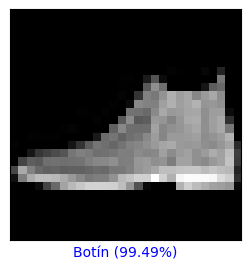

In [34]:
import matplotlib.pyplot as plt

def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='gray')

    predicted_label = predictions_array[i].argmax()
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{class_names[predicted_label]} ({100 * predictions_array[i][predicted_label]:.2f}%)", color=color)

plt.figure(figsize=(6, 3))
plot_image(0, predictions, test_labels, test_images)
plt.show()


*Una* prediccion es un array de 10 numeros. Estos representan el nivel de "confianza" del modelo sobre las imagenes de cada uno de los 10 articulos de moda/ropa. Puedes revisar cual tiene el nivel mas alto de confianza:

In [35]:
prediccion = predictions[0]

print("Array de predicciones:", prediccion)

indice_con_mayor_confianza = prediccion.argmax()
print(f"Índice de la clase con mayor confianza: {indice_con_mayor_confianza}")
print(f"Nombre de la clase predicha: {class_names[indice_con_mayor_confianza]}")

print(f"Nivel de confianza: {prediccion[indice_con_mayor_confianza] * 100:.2f}%")

Array de predicciones: [8.8431037e-08 6.6687962e-09 5.8031718e-10 7.4130596e-10 6.0361743e-10
 2.1299495e-05 1.4796754e-08 5.0559896e-03 2.1382284e-07 9.9492234e-01]
Índice de la clase con mayor confianza: 9
Nombre de la clase predicha: Botín
Nivel de confianza: 99.49%


Entonces, el modelo tiene mayor confianza que esta imagen es un bota de tobillo "ankle boot" o `class_names[9]`. Examinando las etiquetas de *test* o de pruebas muestra que esta clasificación es correcta:

**Grafica** esto para poder ver todo el set de la prediccion de las 10 clases.

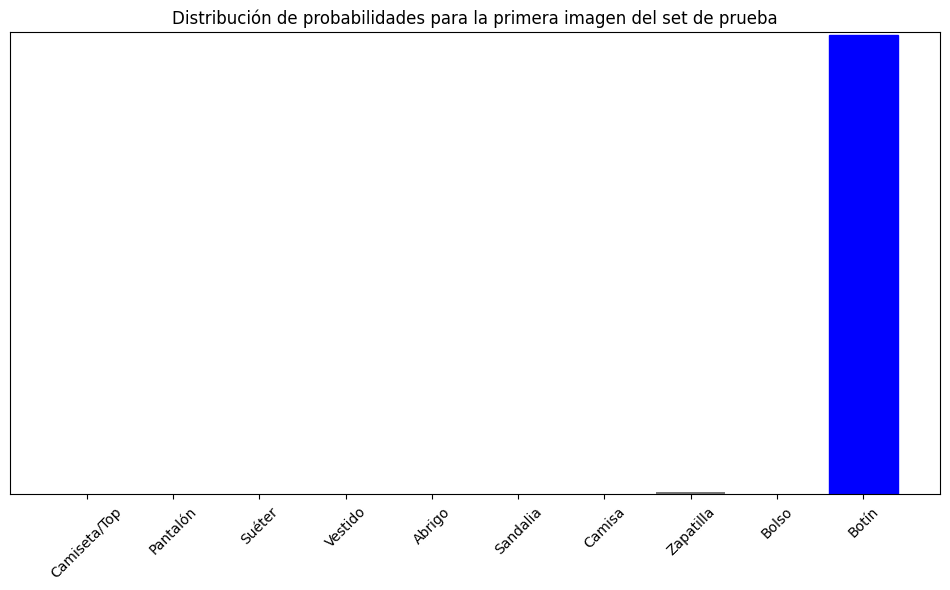

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Función para graficar la barra de predicciones
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10), class_names, rotation=45)
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])

    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')  # Color rojo para la predicción más alta
    thisplot[true_label].set_color('blue')  # Color azul para la etiqueta correcta

# Graficar la primera imagen
plt.figure(figsize=(12, 6))
plot_value_array(0, predictions, test_labels)
plt.title("Distribución de probabilidades para la primera imagen del set de prueba")
plt.show()

Miremos la imagen [0], sus predicciones y el array de predicciones. Las etiquetas de predicción correctas estan en azul y las incorrectas están en rojo. El número entrega el porcentaje (sobre 100) para la etiqueta predecida.

Vamos a graficar multiples imagenes con sus predicciones. Notese que el modelo puede estar equivocado aun cuando tiene mucha confianza.

IndexError: list index out of range

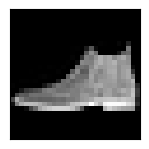

In [40]:
plt.figure(figsize=(15, 30))
for i in range(num_images):
    plt.subplot(num_images, 2, 2 * i + 1)
    plot_image(i, predictions, test_labels, test_images)

    plt.subplot(num_images, 2, 2 * i + 2)
    plot_value_array(i, predictions, test_labels)

plt.tight_layout()
plt.show()

Evalúa tu modelo con una matriz de confusión e interprétala.

In [41]:
from sklearn.metrics import confusion_matrix

In [43]:
predictions = model.predict(test_images)

predicted_labels = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [45]:
import seaborn as sns

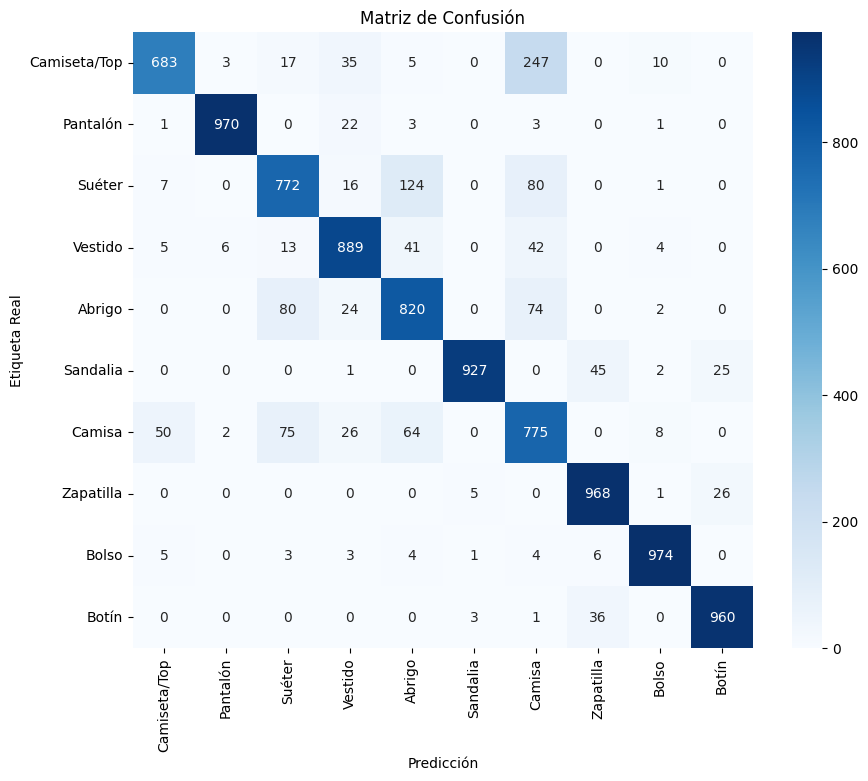

In [46]:
cm = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Etiqueta Real")
plt.show()


Finalmente, usamos el modelo entrenado para hacer una prediccion sobre una única imagen.

In [48]:
index = 0
test_image = test_images[index]
test_label = test_labels[index]

In [51]:
test_image = test_images[index]
test_label = test_labels[index]

test_image = np.expand_dims(test_image, axis=-1) 
test_image = np.expand_dims(test_image, axis=0) 

prediction = model.predict(test_image)

predicted_label = np.argmax(prediction)
print(f"Predicción: {class_names[predicted_label]}")
print(f"Etiqueta real: {class_names[test_label]}")

plt.imshow(test_images[index], cmap='gray')
plt.title(f"Predicción: {class_names[predicted_label]} | Real: {class_names[test_label]}")
plt.axis('off')
plt.show()

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

Diré que he tirado mucho mucho de ChatGpt para estos ejercicios. Entiendo muy muy poco este modelo y se me hacía muy duro y dificil entenderlo solo con los jupyter de teoria, teniendo mañana presentación del proyecto.<br>
Digamos que es una primera iteración más superficial ya sistida de estos ejercicios para entender mejor las redes neuronales, repasaré en el futuro estos notebooks y los iré haciendo más autónomamente, pero había que entregar valor.